# Pennsylvania

## Full raw data

In [5]:
from utils.data_utils import load_raw_data, visualize_map_with_geometry
from pathlib import Path

# Flatten the JSON structure into a DataFrame
df = load_raw_data(Path('../data/PA_raw_data.json'))

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the dataframe (assuming it's already loaded as `df`)
gdf = gpd.GeoDataFrame(df, geometry=df['geometry'])  # Ensure geometry is parsed

# Step 1: Create grid-like state space
gdf['centroid'] = gdf.geometry.centroid  # Calculate centroids for each county
gdf['grid_x'] = gdf['centroid'].apply(lambda p: round(p.x))
gdf['grid_y'] = gdf['centroid'].apply(lambda p: round(p.y))

# Map counties to grid cells
grid_mapping = {}
for _, row in gdf.iterrows():
    grid_mapping[(row['grid_x'], row['grid_y'])] = row['county']

# Step 2: Validate adjacency
def is_adjacent(county, neighbor_county):
    """Check if two counties are adjacent based on the adjacency list."""
    adjacencies = gdf[gdf['county'] == county]['adj'].values[0]
    return neighbor_county in adjacencies

# Create a dictionary for adjacency checks
grid_adjacency = {}
for (x, y), county in grid_mapping.items():
    # Find all 8 possible neighboring cells
    neighbors = [
        (x - 1, y - 1), (x, y - 1), (x + 1, y - 1),
        (x - 1, y),                 (x + 1, y),
        (x - 1, y + 1), (x, y + 1), (x + 1, y + 1),
    ]
    grid_adjacency[county] = [
        grid_mapping.get(neighbor)
        for neighbor in neighbors
        if grid_mapping.get(neighbor)
    ]

# Verify adjacency consistency
for county, neighbors in grid_adjacency.items():
    for neighbor in neighbors:
        if not is_adjacent(county, neighbor):
            print(f"Adjacency mismatch for {county} and {neighbor}")

# Step 3: Visualize the grid
plt.figure(figsize=(10, 8))
for (x, y), county in grid_mapping.items():
    plt.scatter(x, y, label=county)
    plt.text(x, y, county, fontsize=8, ha='center', va='center')
plt.title("Grid State Space for RL Problem")
plt.xlabel("Grid X")
plt.ylabel("Grid Y")
plt.show()

In [6]:
adjency_mapping = {}

for index, row in enumerate(df.itertuples()):
    adjency_mapping[index] = row.adj

adjency_mapping

{0: [3, 24, 9090],
 1: [6, 18],
 2: [34],
 3: [0, 9, 24, 40, 41, 9055, 9090, 9095],
 4: [6],
 5: [37],
 6: [1, 4, 11, 18, 34, 46, 47],
 7: [8, 25, 29],
 8: [7, 25, 29],
 9: [3, 10, 32, 33, 40, 9052, 9053, 9092, 9095],
 10: [9, 32, 38, 40, 48, 9092],
 11: [6, 13, 18, 21, 22, 45, 46],
 12: [14, 19, 21, 23, 35, 36, 45],
 13: [11, 14, 17, 18, 22, 26],
 14: [12, 13, 19, 22, 23, 26],
 15: [24, 42, 9090],
 16: [25],
 17: [13, 18, 25, 26, 4121, 4131],
 18: [1, 6, 11, 13, 17, 34, 3231, 4121],
 19: [12, 14, 26, 29],
 20: [30, 31, 35, 36, 37, 48],
 21: [11, 12, 22, 23, 45],
 22: [11, 13, 14, 21, 23],
 23: [12, 14, 21, 22],
 24: [0, 3, 15, 38, 41, 42, 43, 9090],
 25: [7, 8, 16, 17, 26, 29, 4131, 4151, 4154, 4163],
 26: [13, 14, 17, 19, 25, 29],
 27: [28, 42, 43, 47, 49, 3145, 3219],
 28: [27, 42, 44, 49, 3219, 9045, 9121],
 29: [7, 8, 19, 25, 26, 4163],
 30: [20, 31, 48],
 31: [20, 30, 48],
 32: [9, 10, 33],
 33: [9, 32],
 34: [2, 6, 18, 47, 3143, 3145, 3229, 3231],
 35: [12, 20, 36, 37, 45],
 36:

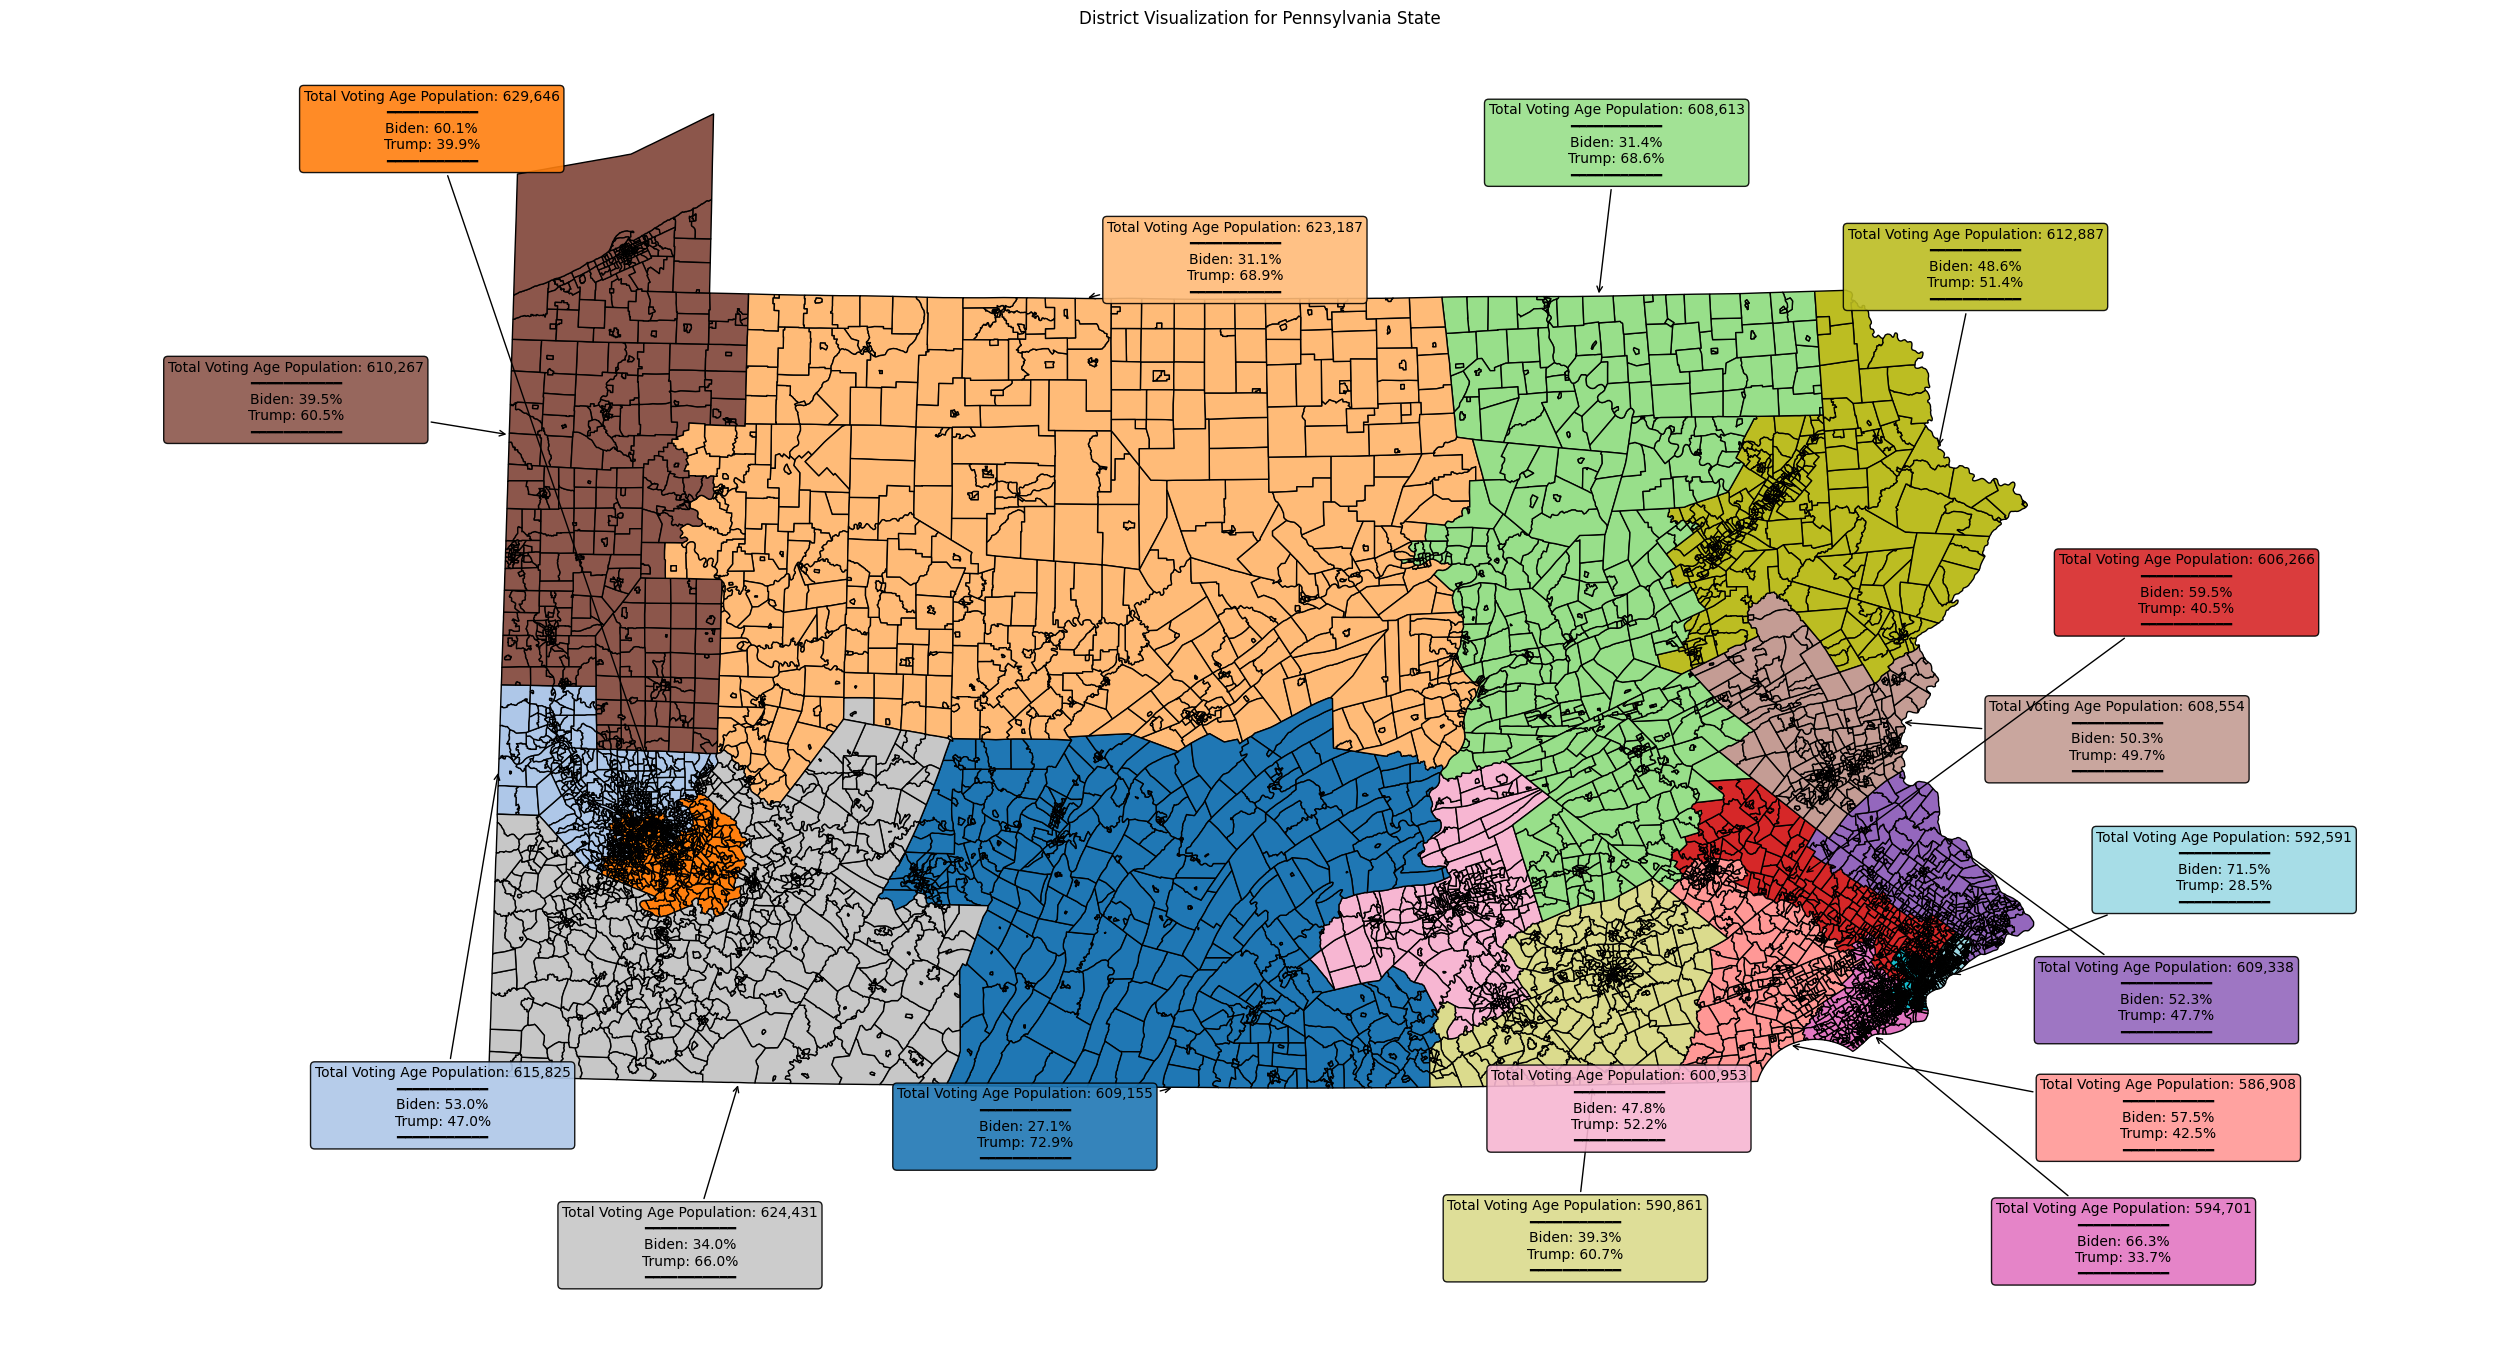

In [7]:
metrics = {
    "total": [("vap", "Voting Age Population")],
    "mean": [],
    "ratio": [[("pre_20_dem_bid", "Biden"), ("pre_20_rep_tru", "Trump")]]
}
visualize_map_with_geometry(df, geometry_col="geometry", district_id_col="cd_2020", state="Pennsylvania", metrics=metrics)

In [ ]:
# largest amount of adjacent nodes:
# max(list(map(len, graph.values())))  # need to make a graph, but it's 8